# Базовый уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 1.1

Загрузите первый лист (`curr`) из файла `data.xlsx` в `pd.DataFrame` (в этой таблице приведены курсы доллара (USD) и евро (EUR) в рублях).

In [1]:
import pandas as pd

pd.set_option('display.max_rows', 15)

df_curr = pd.read_excel('data.xlsx', sheetname='curr')
df_curr

,Date,USD,EUR
0,2013-06-22,32.7433,43.3489
1,2013-06-25,32.9097,43.1018
2,2013-06-26,32.7140,42.9698
3,2013-06-27,32.8876,42.9841
4,2013-06-28,32.8766,42.8349
5,2013-06-29,32.7090,42.7180
6,2013-07-02,32.8517,42.8025
...,...,...,...
981,2017-06-10,57.0020,63.7852
982,2017-06-14,56.9096,63.7729


## Задание 1.2

Выведите на экран тип поля `Date`. Если это `datetime64[ns]` или `<M8[ns]` (по сути то же самое), то мы имеем дело с правильным форматом даты. Если нет, приведите этот столбец к типу `datetime`.

In [2]:
df_curr.dtypes

Date    datetime64[ns]
USD            float64
EUR            float64
dtype: object

## Задание 1.3

Выведите на экран минимальную и максимальную дату. Сколько всего дней содержится в наших данных? (*Hint: даты можно вычитать друг из друга*)

In [3]:
print df_curr.Date.min()
print df_curr.Date.max()
print df_curr.Date.max() - df_curr.Date.min()

2013-06-22 00:00:00
2017-06-21 00:00:00
1460 days 00:00:00


## Задание 1.4

Постройте на одном графике курс доллара и курс евро.

In [4]:
# Заклинание, нужное для отрисовки графиков непосредственно в ноутбуке (подробнее в лекции 7)
%matplotlib inline
# Настройка стиля и размера графиков
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.pyplot.style.use('ggplot')

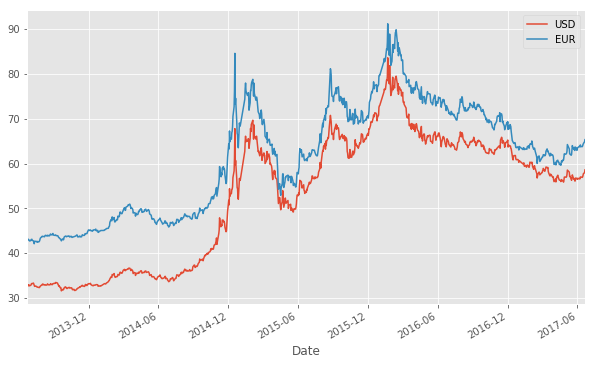

In [5]:
df_curr.plot(x = 'Date')

## Задание 1.5

Найдите среднее значение курса евро в мае 2017 года.

In [6]:
df_curr.loc[(df_curr.Date >= '2017-05-01 00:00:00') & (df_curr.Date < '2017-06-01 00:00:00')]['EUR'].mean()

62.95527368421053

# Продвинутый уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 2.1

Найдите долю дней, когда доллар растет.

In [7]:
(df_curr['USD'].diff() > 0).mean()

0.52631578947368418

## Задание 2.2

Постройте гистограмму доходности доллара.

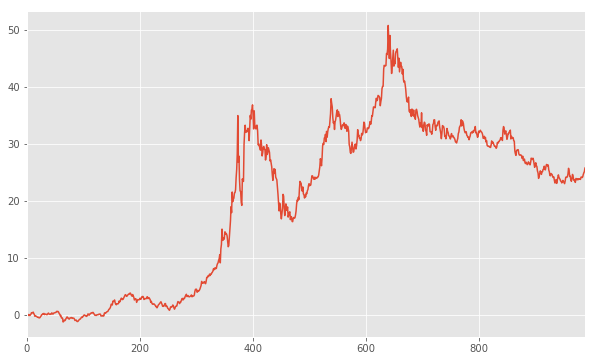

In [9]:
df_curr['USD'].diff().cumsum().plot()

## Задание 2.3

Добавьте в таблицу новую колонку `Weekday` – день недели на русском языке, т.е. строку со значением `u'понедельник'`, `u'вторник'` и т.д. (*Hint: удобно воспользоваться атрибутом* `.dt`)

In [10]:
def week(day):
    days = {0 : u'понедельник',
            1 : u'вторник',
            2 : u'среда',
            3 : u'четверг',
            4 : u'пятница',
            5 : u'суббота',
            6 : u'воскресенье'            
    }    
    return days[day]

In [11]:
df_curr['Weekday'] = df_curr.Date.dt.weekday.apply(week)
df_curr

,Date,USD,EUR,Weekday
0,2013-06-22,32.7433,43.3489,суббота
1,2013-06-25,32.9097,43.1018,вторник
2,2013-06-26,32.7140,42.9698,среда
3,2013-06-27,32.8876,42.9841,четверг
4,2013-06-28,32.8766,42.8349,пятница
5,2013-06-29,32.7090,42.7180,суббота
6,2013-07-02,32.8517,42.8025,вторник
...,...,...,...,...
981,2017-06-10,57.0020,63.7852,суббота
982,2017-06-14,56.9096,63.7729,среда


## Задание 2.4

Рассчитайте корреляцию между курсами доллара и евро за весь доступный период (*Hint: в pandas уже встроена функция для расчета корреляций*).

In [12]:
df_curr.corr()['USD']['EUR']

0.98230892515582702

## Задание 2.5

Несколько лет назад курс евро отличался от курса доллара значительно сильнее, чем сейчас. Чтобы это визуализировать, вычислите курс евро к доллару (т.е. "сколько долларов стоит один евро") за каждый день. Постройте график курса евро к доллару за весь доступный период.

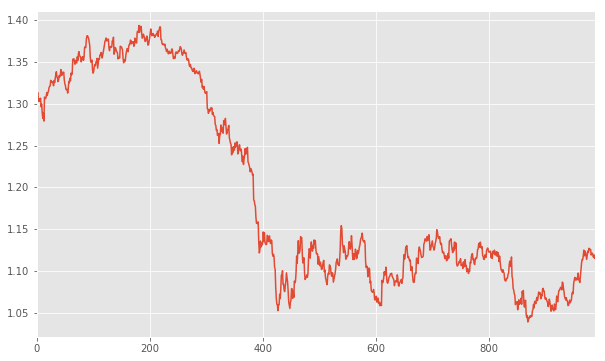

In [13]:
(df_curr.EUR / df_curr.USD).plot()

# Сложный уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 3.1

Загрузите второй лист (`oil`) из файла `data.xlsx` в `pd.DataFrame` (в этой таблице приведены цены за баррель нефти Brent в долларах США).

In [14]:
df_oil = pd.read_excel('data.xlsx', sheetname='oil')
df_oil

,dt,Brent
0,2013-01-02,112.98
1,2013-01-03,113.03
2,2013-01-04,112.58
3,2013-01-07,112.49
4,2013-01-08,113.03
5,2013-01-09,113.07
6,2013-01-10,112.97
...,...,...
1125,2017-06-02,48.46
1126,2017-06-05,48.25


## Задание 3.2

Объедините обе таблицы в одну. Итоговая таблица должна содержать дату в качестве индекса, а также поля `USD` (доллар), `EUR` (евро) и `Brent` (нефть). Обратите внимание, что периоды, за которые доступны данные, немного отличаются для курсов валют и для нефти. Нас интересует только тот период, когда и те, и другие данные присутствуют.

In [15]:
df = pd.merge(df_curr, df_oil, how='inner', left_on='Date', right_on='dt')

In [16]:
df.set_index('Date', inplace=True)

## Задание 3.3

- Постройте на одном графике курсы валют и цены не нефть. Поскольку цена на нефть имеет немного другой масштаб, используйте параметр `secondary_y='Brent'` для отображения дополнительной оси $y$ справа.
- Посчитайте попарные корреляции всех трех временных рядов за весь период.

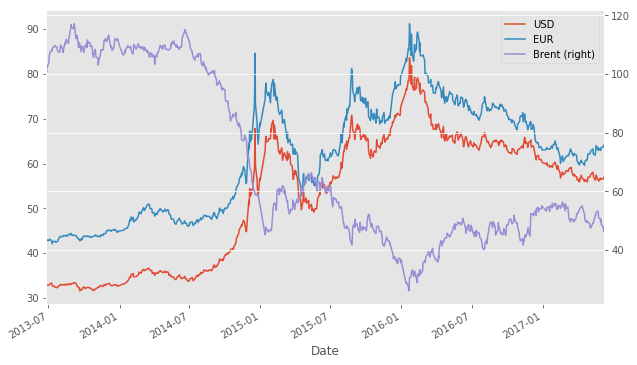

In [17]:
df[['USD', 'EUR', 'Brent']].plot(secondary_y='Brent')

## Задание 3.4

Определите, в какие дни недели лучше покупать евро, а в какие – продавать. Для этого рассчитайте среднюю доходность евро в разные дни недели (т.е. нужно сгруппировать таблицу по дням недели и рассчитать среднее процентное изменение курса евро в каждой группе).

## Задание 3.5

Постройте график "скользящей корреляции" между курсами доллара и евро (таким образом можно найти периоды, когда курсы коррелировали слабее обычного и использовать это для арбитража). Для этого нужно взять скользящее окно (например, 60 последних значений) и рассчитать корреляцию USD - EUR внутри каждого такого окна.